# Project n°1: World hapiness 2017

## Introduction

The World Hapiness Report is a publication written by expert within the United Nations Sustainable Development Solution Network, aiming at identifying the key elements driving a person's well being at national levels. 

This data was collected by the Gallup World Poll, using a set of surveys from more than 160 countries in over 140 languages.
The surveys aim to analyze data from hundreds of thousands of individuals and investigate the ways in which elements of people’s working lives drive their wellbeing.

The main life evaluation question asked in these surveys is the following:

“Please imagine a ladder, with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life for you and the bottom of the ladder represents the worst possible life for you. On which step of the ladder would you say you personally feel you stand at this time?”

Each country is given a happiness score that is the sum of scores from the following 6 key criteria

* GDP per capita
* healthy years of life expectancy
* social support (as measured by having someone to count on in times of trouble)
* trust (as measured by a perceived absence of corruption in government and business)
* perceived freedom to make life decisions
* generosity (as measured by recent donations)

In addition, to these 6 key criteria, another factor is included for the Happiness Score computation: Dystopia. Dystopia is a benchmark country corresponding to the lowest possible values in each of the criteria. This is used to normalize the data and ensure that all countries have at least value positive or null for each of the individual scores.

The countries are then ranked from most happy to least happy.

Finally, the report contains information about job satisfaction in each country.

Our goal is to analyze the relationships between the different variables and discover underlying connections. 

## Project outline: 

This file will follow the general outline of the project guidelines and be organized as follow: 

* A. Importing, cleaning and numerical summaries
* B. Indexing and grouping
* C. Bar plot of the Happiness Score
* D. Histogram of Job Satisfaction
* E. Pairwise Scatter plots
* F. Correlation
* G. Probabilities
* H. Matrices

We have also included a Bonus section at the end of the notebook in order to discuss our findings together with ways of points of improvements and perspectives of analyses.

## A. Importing, cleaning and numerical summaries 

First part of this notebook is to import data, prepare them for analysis and explore and summarize the variables


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Import data
happy = pd.read_csv("./data/data.csv")

# checking the data was correctly imported 
happy.head()

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
0,Malta,27,6.527,1.343280,1.488412,0.821944,0.588767,0.574731,0.153066,1.556863,85.2,Western Europe
1,Zimbabwe,138,3.875,0.375847,1.083096,0.196764,0.336384,0.189143,0.095375,1.597970,56.3,Africa
2,Cyprus,65,5.621,1.355938,1.131363,0.844715,0.355112,0.271254,0.041238,1.621249,88.7,Eastern Europe
3,Iran,108,4.692,1.156873,0.711551,0.639333,0.249323,0.387243,0.048761,1.498735,70.3,Asia-Pacific
4,Mexico,25,6.578,1.153184,1.210862,0.709979,0.412730,0.120990,0.132774,2.837155,82.4,Latin America


In [3]:
# Checking the number of observations
happy.shape

(153, 12)

The dataset contains 113 observations and 12 columns. 

In [4]:
# Checking the type of the variables
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 12 columns):
Country             153 non-null object
Happiness Rank      153 non-null int64
Happiness Score     153 non-null float64
Economy             153 non-null float64
Family              153 non-null float64
Health              153 non-null float64
Freedom             153 non-null float64
Generosity          153 non-null float64
Corruption          153 non-null float64
Dystopia            153 non-null float64
Job Satisfaction    151 non-null float64
Region              153 non-null object
dtypes: float64(9), int64(1), object(2)
memory usage: 14.4+ KB


We have: 
* 2 character variables:
    * Country: the name of the countries for which the scores are collected
    * Region: the world region in which each country can be classified 
* 1 integer variable
    * Happiness Rank: the rank for each country, sorting the countries from most happy to least happy according to the globl Hapiness Score
* 9 float variables: 
    * Happiness Score: the global hapiness score computed from the other scores
    * Economy: score of the contribution of the GPD per capita to happiness
    * Family: score of the contribution of social support (as measured by having someone to count on in times of trouble) to happiness
    * Health: score of the contribution of healthy years of life expectancy to happiness
    * Freedom: score of the contribution of perceived freedom to make life decisions to happiness 
    * Generosity: score of the contribution of generosity (as measured by recent donations) to happiness
    * Corruption: score of the contribution of trust (as measured by a perceived absence of corruption in government and business) to happiness
    * Dystopia: score of the contribution of dystopia (benchmark country corresponding to the lowest possible values in each of the criteria)
    * Job Satisfaction: job satisfaction in each country. This variable is not taken into account to compute the global Happiness Score. 


In [5]:
# Setting index to a meaningful information: (name of country) 
happy.set_index('Country', inplace = True)
# Saving  all column names
happy_variables = list(happy.columns)
# Saving score variables names to ease future analyses
happy_score = happy_variables[1: len(happy_variables)-2]
happy_score

['Happiness Score',
 'Economy',
 'Family',
 'Health',
 'Freedom',
 'Generosity',
 'Corruption',
 'Dystopia']

According to the results of ‘happy.info()‘: only one variable has missing data: Job satisfaction. This variable has 151 values instead of 153. 

In [6]:
happy[happy['Job Satisfaction'].isna()]

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
Country,,,,,,,,,,,
North Cyprus,61,5.810,1.346911,1.186303,0.834647,0.471204,0.266846,0.155353,1.549158,NaN,Eastern Europe
South Sudan,147,3.591,0.397249,0.601323,0.163486,0.147062,0.285671,0.116794,1.879567,NaN,Africa


The countries with these missing values are North Cyprus and South Sudan, with respective ranks 61 and 147. 

As there are very few missing values, it is decided for this analysis to drop these observations 

In [7]:
# Remove missing values 
happy_complete = happy[happy['Job Satisfaction'].notna()].copy()

In [8]:
# Check dataset
happy_complete.shape

(151, 11)

The types of all variables are consistent with what they measure: The Happiness Rank is an integer as expected. The Happiness Score and all the individual scores, as well as the Job Satisfaction are floats which is consistent with the measure of a normalized score. This means that no unusual value has been entered (example: text) to denote missing data. 
The following table describes the quantitative variables: 

In [9]:
# Summarizing quantitative data: 
happy_complete.describe()

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,77.827815,5.357874,0.983895,1.190509,0.550794,0.409805,0.244914,0.123008,1.854910,75.209934
std,44.934732,1.132826,0.420955,0.286371,0.236116,0.150144,0.135236,0.102776,0.502189,12.962365
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914,44.400000
25%,39.500000,4.505500,0.663371,1.042635,0.369866,0.303677,0.152574,0.056919,1.605148,68.950000
50%,78.000000,5.279000,1.064578,1.253918,0.606042,0.437454,0.230947,0.089283,1.832910,78.100000
75%,116.500000,6.101500,1.314879,1.418162,0.715975,0.519467,0.323762,0.152207,2.161605,85.100000
max,155.000000,7.537000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485,95.100000


The Happiness Score has an average value of 5.35, ranges from 2.69 to 7.54 and has a standard deviation of 1.13. All other variables used to compute the Happiness Score are of the same order of magnitude, as expected: Their means and standard deviations range from 0.12 and 0.10 for Corruption to 1.85 and 0.5 for Dystopia. 
The Job Satisfaction is 75% on average, and ranges from 44% to 95%.

Except for Dystopia, the minimum for all individual scores is 0. Countries with 0 for at least one of the individual scores are listed below. This is as expected, since all individual scores have been transformed in relation to Dystopia to ensure a positive (or at least null) value). 

In [10]:
happy_complete.loc[(happy_complete[happy_score]==0).any(axis = 1)]

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
Country,,,,,,,,,,,
Lesotho,139,3.808,0.521021,1.190095,0.000000,0.390661,0.157497,0.119095,1.429835,44.4,Africa
Angola,140,3.795,0.858428,1.104412,0.049869,0.000000,0.097926,0.069720,1.614482,71.1,Africa
Greece,87,5.227,1.289487,1.239415,0.810199,0.095731,0.000000,0.043290,1.749222,79.2,Eastern Europe
Central African Republic,155,2.693,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005,70.4,Africa
Bosnia and Herzegovina,90,5.182,0.982409,1.069336,0.705186,0.204403,0.328867,0.000000,1.892173,73.7,Eastern Europe


As these values are expected, we are sure that these are not missing values and are kept in the analysis.


Finally, we investigate the character variable: "Region"

In [11]:
happy_complete.Region.value_counts()

Asia-Pacific      43
Africa            43
Latin America     22
Eastern Europe    21
Western Europe    19
North America      2
Europe             1
Name: Region, dtype: int64

Region has 7 modalities: 43 countries are in Asia-Pacific, 43 in Africa, 22 in Latin America, 19 in Western Europe, 19 in Eastern Europe, 2 in North America, 1 in Europe. North America and Europe both have a very small number of countries. 

In the case of Europe, it is likely that this is an error as it would note make sense to have both: one "Europe" category and a split between Western and Eastern Europe. 
The country with this category is Ukraine: 

In [12]:
happy_complete.loc[happy_complete["Region"] == "Europe"]

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
Country,,,,,,,,,,,
Ukraine,132,4.096,0.894652,1.394538,0.575904,0.122975,0.270061,0.023029,0.814382,72.3,Europe


Ukraine is a country located in Eastern Europe, therefore it makes sense to group this country in the "Eastern Europe" category.

In [13]:
happy_complete["Region"].replace(to_replace = "Europe", value = "Eastern Europe", inplace = True)
happy_complete.Region.value_counts()

Asia-Pacific      43
Africa            43
Eastern Europe    22
Latin America     22
Western Europe    19
North America      2
Name: Region, dtype: int64

In the case of North America, there are only 2 countries, which is true to reality. This means that any statistics computed on this category would be poorly estimated. It would make sense to group all american (Latin and North) countries in a single category: "America". 

In [14]:
happy_complete["Region"].replace(to_replace = ["Latin America", "North America"], value = "America", inplace = True)
happy_complete.Region.value_counts()

Asia-Pacific      43
Africa            43
America           24
Eastern Europe    22
Western Europe    19
Name: Region, dtype: int64

After the preprocessing, we now have have a dataset with 151 countries with complete observations, split into 5 regions. 
The 10 happiest and the 10 least happy countries are listed below: 

In [15]:
# Listing the 10 most happy countries
happy_complete.sort_values(by = ['Happiness Rank'], ascending = True).head(10)

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
Country,,,,,,,,,,,
Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,94.6,Western Europe
Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,93.5,Western Europe
Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,94.5,Western Europe
Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,93.7,Western Europe
Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,91.2,Western Europe
Netherlands,6,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,93.8,Western Europe
Canada,7,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,90.5,America
New Zealand,8,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,88.6,Asia-Pacific
Sweden,9,7.284,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,92.7,Western Europe


7 out of the top 10 happiest countries in the world are located in Western Europe. The Happiness Score ranges from 7.537 for Norway, to 7.284 for Sweden and Australia. All countries have a Job Satisfaction superior to 88%. 

In [16]:
# Listing the 10 least happy countries
happy_complete.sort_values(by = ['Happiness Rank'], ascending = False).head(10)

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
Country,,,,,,,,,,,
Central African Republic,155,2.693,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005,70.4,Africa
Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,54.3,Africa
Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,57.8,Africa
Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,62.7,Asia-Pacific
Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,51.7,Africa
Togo,150,3.495,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229,44.8,Africa
Guinea,149,3.507,0.244550,0.791245,0.194129,0.348588,0.264815,0.110938,1.552312,55.1,Africa
Liberia,148,3.533,0.119042,0.872118,0.229918,0.332881,0.266550,0.038948,1.673286,56.6,Africa
Yemen,146,3.593,0.591683,0.935382,0.310081,0.249464,0.104125,0.056767,1.345601,58.9,Asia-Pacific


7 out of the top 10 least happy countries in the world are located in Africa.The happiness score ranges from 2.905 to 3.644 and the Job satisfaction ranges from 44.8 to 62.7.

## B. Indexing and grouping
In the next section, we are going to analyse the Happiness Score per region. 
First, we separate the dataset per region and save the corresponding datasets in separate csv files.

In [17]:
# separate dataset per region
africa = happy_complete.loc[happy_complete['Region'] == 'Africa'].copy()
western = happy_complete.loc[happy_complete['Region'] == 'Western Europe'].copy()
eastern = happy_complete.loc[happy_complete['Region'] == 'Eastern Europe'].copy()
america = happy_complete.loc[happy_complete['Region'] == 'America'].copy()
asia = happy_complete.loc[happy_complete['Region'] == 'Asia-Pacific'].copy()

In [18]:
sum([africa.shape[0], western.shape[0], eastern.shape[0], america.shape[0], asia.shape[0]])

151

In [19]:
# Save datasets to separate csv file 
africa.to_csv('./data/africa.csv')
western.to_csv('./data/western.csv')
eastern.to_csv('./data/eastern.csv')
america.to_csv('./data/america.csv')
asia.to_csv('./data/asia.csv')

We first compute the mean happiness score per region:

In [20]:
# Computing the mean score per regions and sorting them from most happy to least happy

regions_summ = happy_complete.reset_index().groupby('Region')['Happiness Score'].mean()
regions_summ.sort_values(ascending = False)

Region
Western Europe    6.880474
America           6.057542
Eastern Europe    5.435182
Asia-Pacific      5.358326
Africa            4.254581
Name: Happiness Score, dtype: float64

Western Europe is the region with the highest Hapinness score: 6.88. This is followed by America (6.06), Eastern Europe (5.44), Asia-Pacific (5.35) and finally, Africa (4.25). 

If we investigate the number of countries with a score > 6: 

In [21]:
# Computing the number of country with a score > 6 per regions

happy_complete.loc[happy_complete['Happiness Score']> 6].reset_index().groupby('Region')['Region'].value_counts().sort_values(ascending = False)
#list(happy_complete.loc[happy_complete['Happiness Score']> 6].reset_index().groupby('Region')['Country'])

Region          Region        
Western Europe  Western Europe    17
America         America           15
Asia-Pacific    Asia-Pacific      11
Eastern Europe  Eastern Europe     1
Name: Region, dtype: int64

We can see that as expected, Western Europe and America are the two regions with the most countries fulfilling this criteria (17/19 and 15/24). However, even though Eastern Europe has a happiness score slightly superior to Asia-Pacific, more countries have a happiness score superior to 6 in Asia-Pacific (11/43 against 1/20). This means that the happiness score is globally more homogeneous in Eastern Europe than in Asia-Pacific. 

Indeed, if we compute the range (max - min) of the Happiness Score per region: 

In [22]:
# compute range per region
happy_complete.reset_index().groupby('Region').apply(lambda x: x['Happiness Score'].max() - x['Happiness Score'].min()).sort_values(ascending = False)

Region
Asia-Pacific      3.852
America           3.713
Africa            3.179
Western Europe    2.342
Eastern Europe    2.002
dtype: float64

We can see that Asia-Pacific is the region with the biggest range (3.852), while Eastern Europe is the region with the smallest range (2.002). As expected from previous results, Western Europe also has a small range (2.342). America has the second largest range (3.713) which could be explained by the grouping of North and Latin America. 

## C. Barplot of the Happiness Score
In this next section, we will explore the happiness Score at the countries level. 

The first figure shows the Happiness Score of the the top 10 happiest countries. 

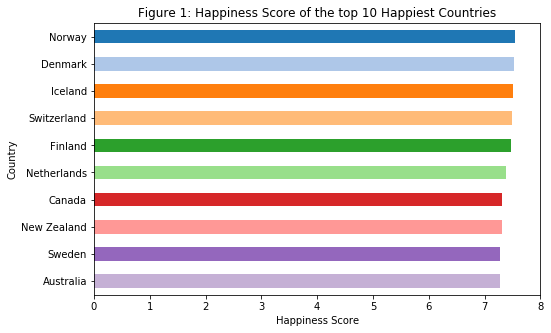

In [23]:
### 3.1 Bar plot of the happiness Score for the top 10 countries 

top10 = happy_complete.sort_values(by = ['Happiness Rank'], ascending = True).head(10)


plt.figure(figsize=(8,5))
colormap = plt.cm.tab20(range(0, 10))
barplot = top10['Happiness Score'].plot.barh(color = colormap)
barplot.set_title('Figure 1: Happiness Score of the top 10 Happiest Countries')
barplot.set_xlabel('Happiness Score')
barplot.set_ylabel('Country')
barplot.invert_yaxis()
barplot.set(xlim=(0, 8))
plt.show()


As described earlier, Norway is the happiest country in the world, followed by Denmark, Iceland and Switzerland. 
All countries of the top 10 have very similar score superior to 7. 

The next figure shows how the global score is composed for the top 10 countries: 

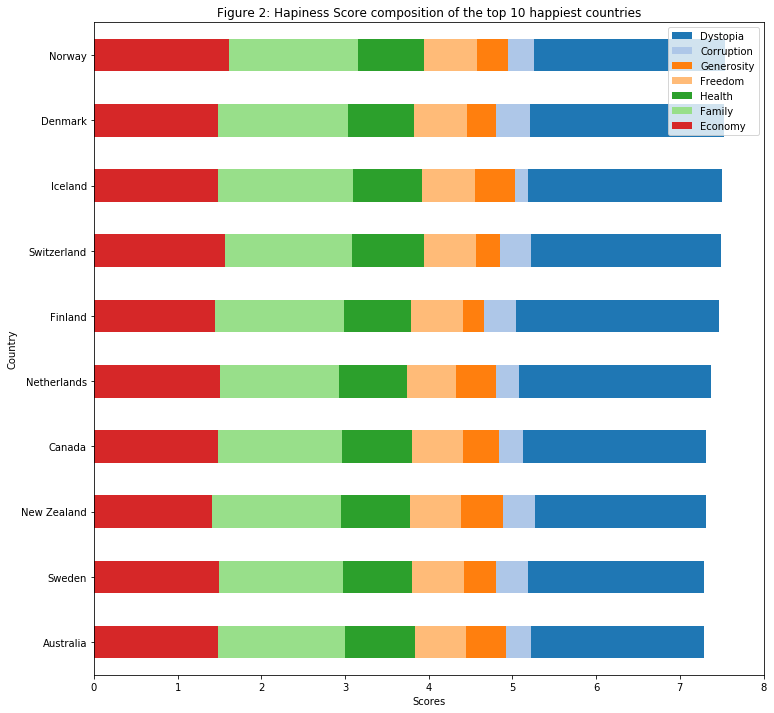

In [24]:
#3.2 Stacked bar plot of Happiness Score
scores = happy_variables[2:9]
colors = plt.cm.tab20(range(0, len(scores)))

# figure and axis
fig, ax = plt.subplots(1, figsize=(12, 12))
for idx, score in enumerate(scores): 
    top10[scores[:len(scores)-idx]].apply('sum', axis = 1).plot.barh(color = colors[idx])

#plt.set(xlim=(0, 8))
plt.xlabel('Scores')
plt.ylabel('Country')
plt.title('Figure 2: Hapiness Score composition of the top 10 happiest countries')
plt.legend(scores[::-1])
ax.invert_yaxis()
ax.set(xlim=(0, 8))

plt.show()

We can see that the contribution of each factor is roughly equivalent between countries. 

As Dystopia is used for benchmarking, we chose to focus on the key 6 criterias for the remaining analysis. Economy and Familiy are the two biggest contributors, then Health and Freedom, and finally Generosity and Corruption. 

If we compare this to the composition of the happiness Score for all countries in Africa:

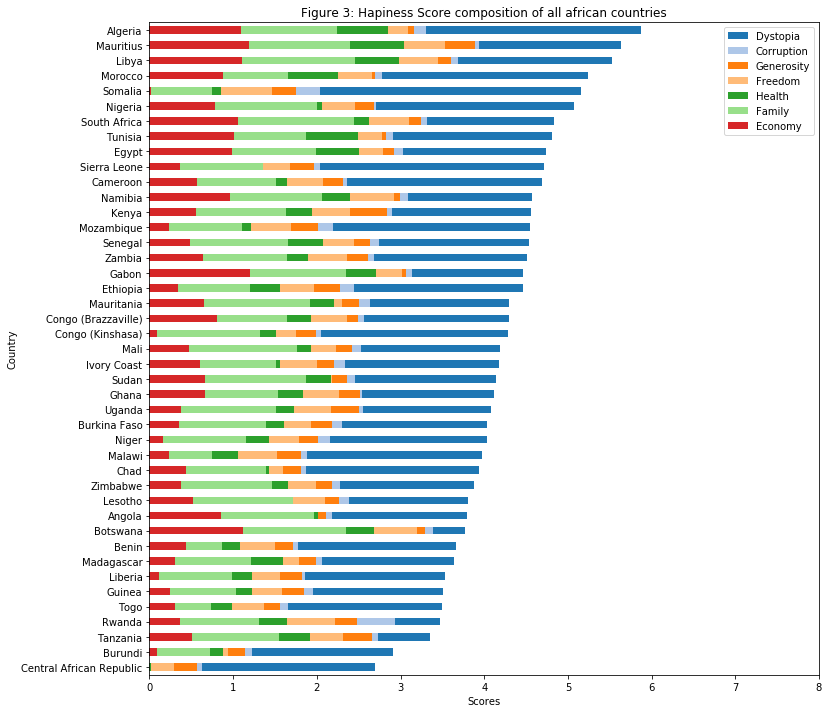

In [25]:
#3.3 Stacked bar plot of Happiness Score for all countries in Africa
#sort countries by Happiness rank
africa.sort_values(by = 'Happiness Rank', ascending = True, inplace = True)

# figure and axis
fig, ax = plt.subplots(1, figsize=(12, 12))
for idx, score in enumerate(scores): 
    africa[scores[:len(scores)-idx]].apply('sum', axis = 1).plot.barh(color = colors[idx])

#plt.set(xlim=(0, 8))
plt.xlabel('Scores')
plt.ylabel('Country')
plt.title('Figure 3: Hapiness Score composition of all african countries')
plt.legend(scores[::-1])
ax.invert_yaxis()
ax.set(xlim=(0, 8))

plt.show()

We can see that the contribution of each factor is a bit more heterogeneous between countries. Familly has usually the bigger contrinbution, while Economy has a wide range of contributions a bigger contribution than Economy. Freedom also usually have a bigger contribution than Health. 



In conclusions, it seems that the Happiest countries are richer countries and the thriving economy is the most important component in the global happiness with the exisetence of a good social support (Family) and a healthy life expectancy (Health). 
On the contrary, the least happy countries are poorer countries, where social support (family) is the key criteria in the perceived Happiness. While the GDP per capita(Economy) might play a role, it is not as systematic as for the happiest countries. Moreover, the percieved freedom of making life decisions (Freedom) also plays a more important role than Health in happiness for these countries. 

## D. Histogram of Job Satisfaction
Finally, we investigate the distribution of the job satisfaction across countries. 

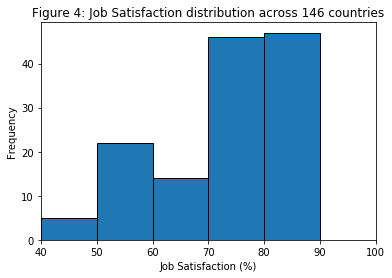

In [26]:
#2.4 Histogram of Job Satisfaction
plt.hist(happy_complete['Job Satisfaction'], edgecolor='black', bins=range(40,100,10))
plt.xlabel('Job Satisfaction (%)')
plt.ylabel('Frequency')
plt.title('Figure 4: Job Satisfaction distribution across 146 countries')
plt.xlim(left=40, right = 100)
plt.show()

We can see that the distribution of the job satisfaction doesn't follow a bell curve and is skewed towards the right of the figure. Even though, no countries have a job satisfaction superior to 90%, more than 50% of the countries have a global job satisfaction supertior to 70%. 

## E. Pairwise scatterplots

We are now interested in investigating the relationships between the Happiness Score and the individual scores. 
We first plot pairwise scatterplots between the Happiness Score and the other variables: 

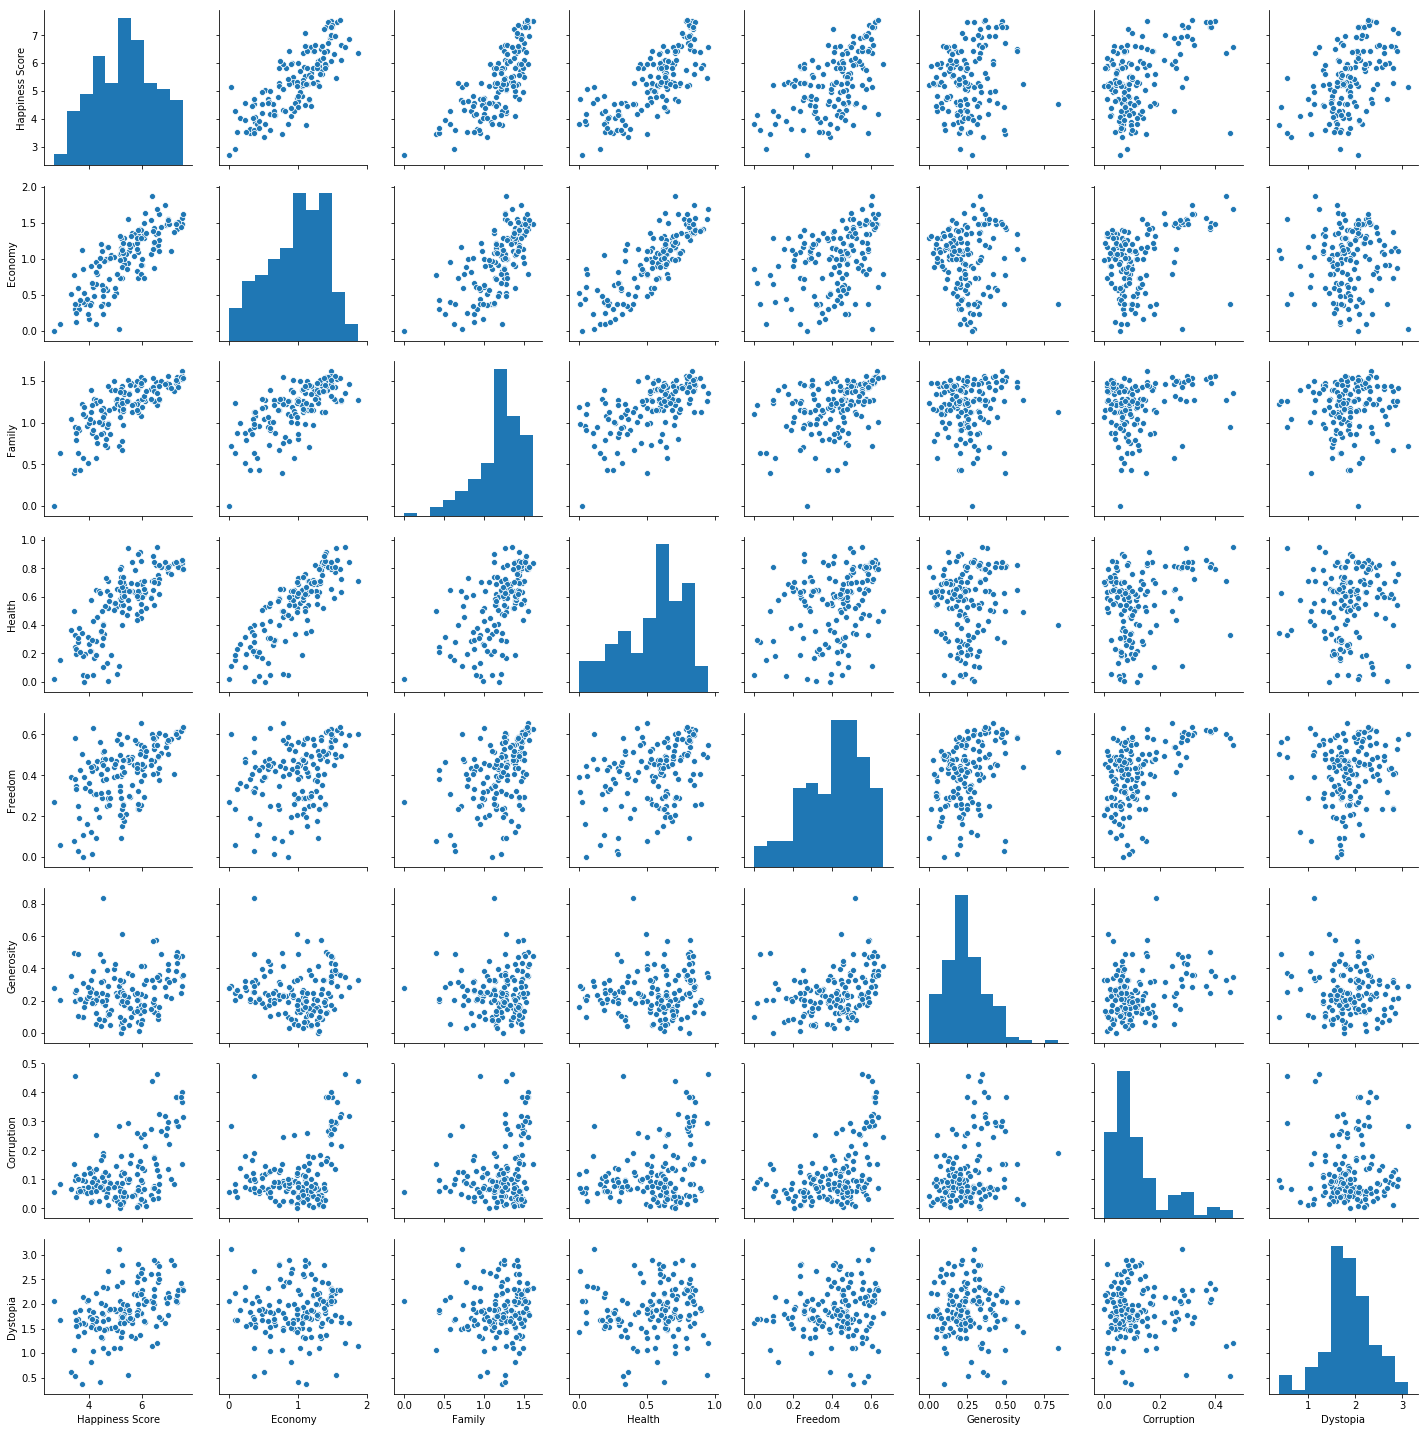

In [27]:
sns.pairplot(happy_complete[happy_score])

These pairwise scatterplots give us several informations: 
* First, we can see that only Happiness Score, Economy and Dystopia seem to be normally distributed. The other variables show a skewed distribution.
* Second, there seems to be a positive linear relationship between the Happiness Score and Economy, Family, Health, Freedom and Dystopia.

## F. Correlation

Based on the observations from the previous section, we compute the correlations between the score variables. 
We used the spearman coefficient, which is a non parametric correlation coefficient, as all relationships don't seem to be linear. 

In [28]:
# Correlation: 
happy_complete[["Happiness Score"]+scores].corr(method = "spearman")

,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia
Happiness Score,1.000000,0.821805,0.773905,0.785710,0.557932,0.143371,0.312966,0.509197
Economy,0.821805,1.000000,0.714758,0.852757,0.405957,0.012231,0.250756,0.083597
Family,0.773905,0.714758,1.000000,0.634981,0.472858,0.082827,0.210749,0.149118
Health,0.785710,0.852757,0.634981,1.000000,0.355870,0.078634,0.180362,0.116532
Freedom,0.557932,0.405957,0.472858,0.355870,1.000000,0.356518,0.475064,0.110875
Generosity,0.143371,0.012231,0.082827,0.078634,0.356518,1.000000,0.219097,-0.014855
Corruption,0.312966,0.250756,0.210749,0.180362,0.475064,0.219097,1.000000,0.057804
Dystopia,0.509197,0.083597,0.149118,0.116532,0.110875,-0.014855,0.057804,1.000000


As expected, the highest correlations are found between Happiness Score and Economy(0.82), Health (0.78) and Family (0.77). 
Economy is also very well correlated with Health (0.85) and Family (0.70). 

These 3 factors (Economy, health and Family) could thus potentially be good predictors of the Happiness Score of a country. 

## G. Probability

We are interested in knowing the probability for a random country having a Happiness Score superior to 6.0, to be from western europe. 
Let: 
* X be a random variable describing the Happiness Score
* A the event of a random country being from Western Europe
* B the event of a country having a score superior to 6

In other terms, we are interested in computing the conditional probability: p(A|B) 
According to the Bayes formula, p(A|B) can be decomposed as: 
$p(A|B) = \cfrac{p(B \cap A)}{p(B)}$

Where $p(B \cap A)$ is the probability of a random country to have a score superior to 6 and be from Western Europe.

The probabbility of a random country of having a score superior to 6 is: 
$p(B) = \cfrac{\text{number of countries having a score > 6}}{\text{total number of countries}}$

In [29]:
pB = happy_complete.loc[happy_complete["Happiness Score"] > 6]["Happiness Score"].count()/happy_complete.shape[0]
print("Therefore: \n p(B) = {}".format(round(pB, 4)))







Therefore: 
 p(B) = 0.2914


The probabbility of a random country of having a score superior to 6 and being from Western Europe is: 
$p(B \cap A) = \cfrac{\text{number of countries from Western Europe having a score > 6}}{\text{total number of countries}}$

In [30]:
pBA = western.loc[western["Happiness Score"] > 6]["Happiness Score"].count()/happy_complete.loc[happy_complete["Region"]=="Western Europe"].Region.value_counts()
print("Therefore: \n p(B.A) = {}".format(round(pBA, 4)))

Therefore: 
 p(B.A) = Western Europe    0.8947
Name: Region, dtype: float64


Finally,

$p(A|B) = \cfrac{\text{number of countries from Western Europe having a score > 6}}{\text{total number of countries}} / \cfrac{\text{number of countries having a score > 6}}{\text{total number of countries}}$

$p(A|B) = \cfrac{\text{number of countries from Western Europe having a score > 6}}{\text{number of countries having a score > 6}}$

In [31]:
pAB = western.loc[western["Happiness Score"] > 6]["Happiness Score"].count()/happy_complete.loc[happy_complete["Happiness Score"] > 6]["Happiness Score"].count()
print("Therefore: \n p(A|B) = {}".format(round(pAB, 4)))

Therefore: 
 p(A|B) = 0.3864


In order to check our result, we run the following simulation: 

We draw a random country from the dataset 1 000 000 times and count: 
* a: how many times a country has a score > 6 
* b: how many times a a country has a score >6 and is from Western Europe 

Return the ratio b/a. 

In [32]:
# Simulation 
import random
def draw_country(N,df, region, score): 
    tot_score= 0
    tot_reg_score = 0
    for i in range(N): 
        country = df.iloc[random.randrange(df.shape[0])]
        if country["Happiness Score"] > score:
            tot_score+=1
        if country["Happiness Score"] > score and country["Region"] == "Western Europe":
            tot_reg_score += 1
    return tot_reg_score/tot_score

print("Proportion of countries with a score >6 and from Western Europe in countries with a score > 6 is: {}".format(round(draw_country(1000000, happy_complete, "Western Europe", 6),4)))

Proportion of countries with a score >6 and from Western Europe in countries with a score > 6 is: 0.3867


Our results are aligned with the simulation.

## H. Matrices

Finally, to make sure the ideas on broadcasting for matrices are assimilated, we are asked to create a matrice of 0 and 1, where the rows denote the countries and the columns denote the regions. 
To this end, I create two vectors:
* a column vector of 151 lines containing the regions for each countries
* a row vector of 5 elements containing the 5 uniques regions in the dataset 

Using the broadcasting property, I use the numpy.equal() method comparing two arrays element-wise . The output is a 151*5 matrice

In [33]:
matA = np.reshape(np.array(happy_complete['Region']),(happy_complete.shape[0],1))
matB = np.reshape(np.array(list(set(happy_complete['Region']))), len(list(set(happy_complete['Region']))))


In [34]:
matRes = np.equal(matA, matB).astype(int)

In [35]:
matRes.shape

(151, 5)

In [36]:
matA[:5]

array([['Western Europe'],
       ['Africa'],
       ['Eastern Europe'],
       ['Asia-Pacific'],
       ['America']], dtype=object)

In [37]:
matB

array(['Asia-Pacific', 'Eastern Europe', 'Africa', 'Western Europe',
       'America'], dtype='<U14')

In [38]:
matRes

array([[0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0,

## Bonus: Discussion

We have analysed the data of the World Happiness report of 2017 and drawn several observations from the analysis.
First, we have established that rich countries (e.g.: Western Europe) globally have a higher Happiness Score than poor countries (e.g.: Africa). For the top happiest countries, the most important factors contributing to the Happiness Score is homogeneous between countries: Economy and Family are the 2 most important factors . However, for countries with a low happiness Score, Family is consistently the most important factor, while the economy isn't always a large contributor and can even be less important than Freedom. 

Nevertheless, we have identified that Economy, health and Family are strongly correlated to the Happiness Score and to each other. These findings could be used to further the analysis and try to find good predictors of the global Happiness Score based on these data. 

We have followed the template given by the project guidelines, but we can see several points that could be used to improve this analysis. 

Firstly, we could impute the missing data instead of removing them from the dataset. This decision was acceptable here, as we only had 2 rows with missing values. However, with real world data, it is usual to encounter datasets with much more missing data and removing them can introduce undesirable biases in the analysis. 

Secondly, we made the choice to group together North America and Latin america for the Region-based analysis. While this makes sense on a pure geographical point of view, it would also have been possible to group together Western Europe and North America as this would make sense on an economical and cultural point of view. This may have affected the range of Happiness Score for the "America" category for example. 

Finally, it could have been interesting to add other analyses based on other demographical data. For example, comparing rich vs poor countries. Another type of analysis that would give more insight on the important factors on global Happiness Score could also have been to perform an Exploratoy Factor Analysis to identify the importance of higher level concepts in the global Happiness Score (for example, maybe the most important factor is a combination of economical and health considerations). However, this would necesitate to have access to the data before computation of the scores and would be way out of the purpose of this course.   